<a href="https://colab.research.google.com/github/Garciashk/proyecto_caso_de_negocio/blob/main/Notebook/Churn_clasifiacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  <td>
    <a target="_blank" href="https://github.com/Garciashk/proyecto_caso_de_negocio"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /></a>
  </td>
  
</table>


# <img style="float: center; padding-right: 10px;" src="https://www.pikpng.com/pngl/b/467-4670553_universidad-javeriana-esslingen-am-neckar-clipart.png" width="100" height="150">



<h1> <strong>Métodos de Analítica II.</strong></h1> 
<h2> Para: Juan Coba Puerto.</br></h2>
<h2>Integrantes:</br></h2>
<h2>Andrea López Gualtero.</br></h2>
<h2>Juan Sebastián Quiroga Bernal.</br></h2>
<h2>Leonardo H. García Díaz</h2>

**Este colab puede ser ejecutado por cualquier usuario sin necesidad de cargar los archivos al entorno, debido a que la conexión está configurada para acceder a los archivos desde la nube**.

<img style="display: block;-webkit-user-select: none;margin: auto;background-color: hsl(0, 0%, 90%);transition: background-color 300ms;" src="https://www.tractionwise.com/wp-content/uploads/2021/01/Articles-Churn-Rate_Eng.png">

<h1> <strong> Proyecto Caso de Negocio:</strong>Predicción de churn en un Banco</h1> </br> </br> <h2>Durante el último trimestre, una institución financiera experimentó una disminución del 15% en su base de clientes activos, tras descubrir que muchos de ellos estaban migrando a otras entidades financieras a través de información externa de Datacrédito. En respuesta a esta situación, la institución decidió implementar un programa de beneficios que incluye la eliminación de cuotas de manejo, mejores tasas de interés en productos de crédito de consumo y retiros ilimitados en cajeros automáticos. Para maximizar el impacto de estos beneficios, el equipo de Análisis de Clientes necesita identificar a los clientes con mayor probabilidad de retirarse del banco y priorizar sus ofertas. El objetivo final del equipo es construir un modelo predictivo que ayude a predecir qué clientes pueden abandonar el banco y tomar medidas preventivas para retenerlos.</h2></br></br>
<h2><ol>clientnum : Identificador único del cliente.</ol>
<ol>attrition_flag : (Variable Objetivo) Indica si el cliente se fue a otro banco o no.</ol>
<ol>customer_age : Edad del cliente.</ol>
<ol>gender : Sexo del cliente.</ol>
<ol>dependent_count : Número de personas económicamente dependientes del cliente.</ol>
<ol>education_level : Nivel de Educación del Cliente.</ol>
<ol>marital_status : Estado Civil del Cliente.</ol>
<ol>income_category : Categoría de Ingresos del Cliente.</ol>
<ol>card_category : Categoría de tarjeta del cliente.</ol>
<ol>months_on_book : Antigüedad del cliente.</ol>
<ol>total_relationship_count : Total de productos que tiene el cliente con el banco.</ol>
<ol>months_inactive_12_mon : Número de meses en que el cliente estuvo inactivo en el último año.</ol>
<ol>contacts_count_12_mon : Número de contactos con el cliente en el último año.</ol>
<ol>credit_limit : Cupo de crédito del cliente.</ol>
<ol>total_revolving_bal : Balance de crédito rotativo del cliente.</ol>
<ol>avg_open_to_buy : Promedio de cupo disponible en tarjetas de crédito</ol>
<ol>total_amt_chng_q4_q1 : Cambio en el valor total de transacciones entre Q4 y Q1.</ol>
<ol>total_trans_amt : Valor total de transacciones</ol>
<ol>total_trans_ct : Cantidad de transacciones.</ol>
<ol>total_ct_chng_q4_q1 : Cambio en la cantidad total de transacciones entre Q4 y Q1.</ol>
<ol>avg_utilization_ratio : Razón de utilización de la tarjeta.</ol></h2>

<h2>La variable que se busca predecir en el presente notebook es attrition_flag, la cual determina si un cliente se cambio de banco o no. (Binaria).</h2>

# 1. Importar librerias y base de datos.

Se importarán las librerias necesarias para poder usar en el notebook.

In [ ]:
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

bank_churn = '1OZZSqMYtniRlgENtq3lT3DOJQrzcw50Q' 


download = drive.CreateFile({'id': bank_churn}) 
download.GetContentFile('bank_churn.csv')

df = pd.read_csv(r'bank_churn.csv',sep=',')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## EDA


In [ ]:
df.shape

(10127, 21)

In [ ]:
df.columns

Index(['clientnum', 'attrition_flag', 'customer_age', 'gender',
       'dependent_count', 'education_level', 'marital_status',
       'income_category', 'card_category', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio'],
      dtype='object')

In [ ]:
df.isna().sum() #Se evidencia que no hay nulos

clientnum                   0
attrition_flag              0
customer_age                0
gender                      0
dependent_count             0
education_level             0
marital_status              0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
total_revolving_bal         0
avg_open_to_buy             0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_trans_ct              0
total_ct_chng_q4_q1         0
avg_utilization_ratio       0
dtype: int64

In [ ]:
df.groupby('attrition_flag').size() #Desbalanceo

attrition_flag
Attrited Customer    1627
Existing Customer    8500
dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


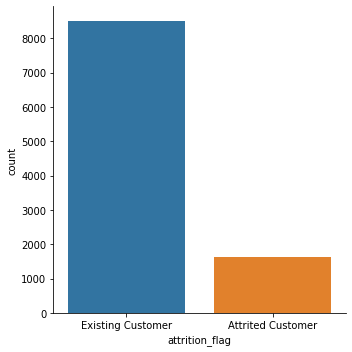

In [ ]:
sns.catplot('attrition_flag',data=df,kind="count")

In [ ]:
df.gender = df.gender.astype("category") 
df.groupby('gender').size()

gender
F    5358
M    4769
dtype: int64

In [ ]:
df.education_level.unique()
df.groupby('education_level').size()

education_level
College          1013
Doctorate         451
Graduate         3128
High School      2013
Post-Graduate     516
Uneducated       1487
Unknown          1519
dtype: int64

In [ ]:
df.attrition_flag.unique()


array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [ ]:
df.marital_status.unique()
df.groupby('marital_status').size()

marital_status
Divorced     748
Married     4687
Single      3943
Unknown      749
dtype: int64

In [ ]:
df.income_category.unique()
df.groupby('income_category').size()

income_category
$120K +            727
$40K - $60K       1790
$60K - $80K       1402
$80K - $120K      1535
Less than $40K    3561
Unknown           1112
dtype: int64

In [ ]:
df.card_category.unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [ ]:
#Se convierten a factor
df.attrition_flag.astype('category')
df.gender.astype('category')
df.education_level.astype('category')
df.marital_status.astype('category')
df.income_category.astype('category')
df.card_category.astype('category')

0          Blue
1          Blue
2          Blue
3          Blue
4          Blue
          ...  
10122      Blue
10123      Blue
10124      Blue
10125      Blue
10126    Silver
Name: card_category, Length: 10127, dtype: category
Categories (4, object): ['Blue', 'Gold', 'Platinum', 'Silver']

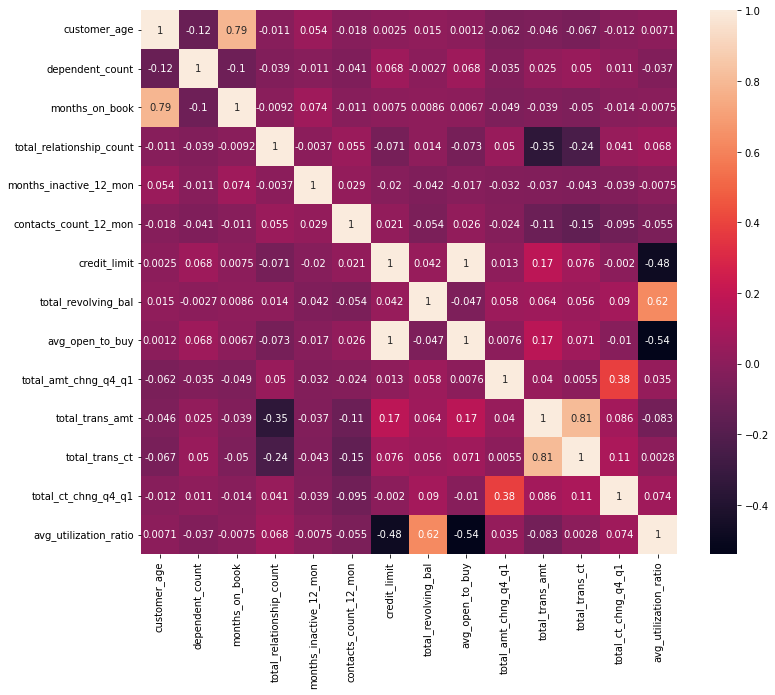

In [ ]:
#Matriz de correlaciones
df.drop(['clientnum'], axis=1,inplace = True)
corr_df=df.corr() 
plt.figure(figsize=(12, 10))
sns.heatmap(corr_df, annot=True)
plt.show()


In [ ]:
df

,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [ ]:
df_1 = df.copy()

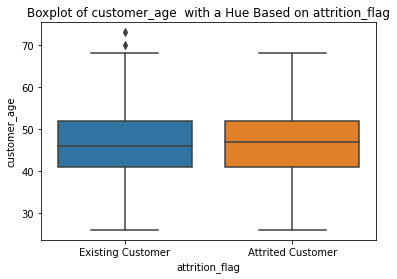

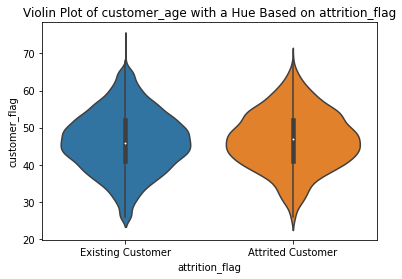

In [ ]:
#Outliers
sns.boxplot(data=df_1, x='attrition_flag', y='customer_age')
#Add a title and y-axis label
plt.title('Boxplot of customer_age  with a Hue Based on attrition_flag')
plt.ylabel('customer_age')
# Show the plot
plt.show()

# Create a violin plot of Tuition with a hue based on Is.Non.Annual.
sns.violinplot(data=df_1, x='attrition_flag', y='customer_age')
# Add a title and y-axis label
plt.title('Violin Plot of customer_age with a Hue Based on attrition_flag')
plt.ylabel('customer_flag')
# Show the plot
plt.show()

<AxesSubplot:xlabel='attrition_flag', ylabel='credit_limit'>

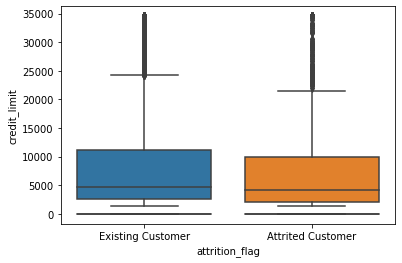

In [ ]:

sns.boxplot(data=df_1, x='attrition_flag', y='total_relationship_count')
sns.boxplot(data=df_1, x='attrition_flag', y='credit_limit')

<AxesSubplot:xlabel='attrition_flag', ylabel='total_trans_ct'>

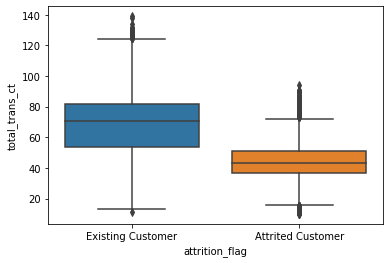

In [ ]:
sns.boxplot(data=df_1, x='attrition_flag', y='total_trans_ct')

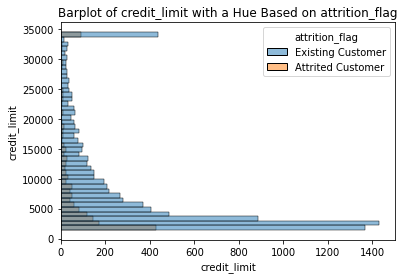

In [ ]:
# Create the histogram
sns.histplot(data=df, y='credit_limit', hue='attrition_flag')

# Add a title and x-axis label
plt.title('Barplot of credit_limit with a Hue Based on attrition_flag')
plt.xlabel('credit_limit')

# Show the plot
plt.show()

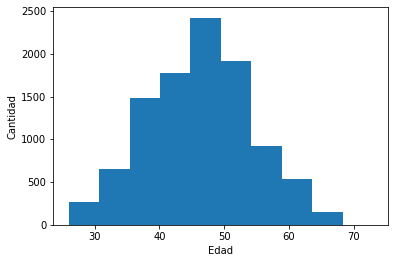

In [ ]:
data = df_1.customer_age
(counts, bins, patches) = plt.hist(data)
plt.xlabel("Edad")
plt.ylabel("Cantidad")
plt.show()